# MSD ODI Analysis 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('msd_odi.xlsx')
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,2004-12-23,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,2004-12-26,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,2004-12-27,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,2005-04-02,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,2005-04-05,ODI # 2236
...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,v West Indies,Manchester,2019-06-27,ODI # 4175
346,42*,42,31,135.48,4,1,v England,Birmingham,2019-06-30,ODI # 4179
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,2019-07-02,ODI # 4182
348,DNB,-,-,-,-,-,v Sri Lanka,Leeds,2019-07-06,ODI # 4187


In [4]:
df.shape

(350, 10)

In [5]:
df.columns

Index(['score', 'runs_scored', 'balls_faced', 'strike_rate', 'fours', 'sixes',
       'opposition', 'ground', 'date', 'odi_number'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   score        350 non-null    object        
 1   runs_scored  350 non-null    object        
 2   balls_faced  350 non-null    object        
 3   strike_rate  350 non-null    object        
 4   fours        350 non-null    object        
 5   sixes        350 non-null    object        
 6   opposition   350 non-null    object        
 7   ground       350 non-null    object        
 8   date         350 non-null    datetime64[ns]
 9   odi_number   350 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 27.5+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
count=0
for i,v in enumerate(df['runs_scored']):
    if isinstance(v, str):
        print(i,v, end=',') #find the reason for dtype of runs_scored is obj
        count+=1
print('\n\nTotal:',count)

20 -,24 -,27 -,31 -,47 -,49 -,62 -,65 -,76 -,84 -,103 -,107 -,111 -,133 -,138 -,143 -,144 -,153 -,156 -,177 -,192 -,202 -,209 -,220 -,221 -,222 -,227 -,229 -,237 -,244 -,245 -,252 -,256 -,258 -,275 -,276 -,277 -,286 -,288 -,289 -,295 -,296 -,305 -,311 -,313 -,317 -,318 -,322 -,324 -,327 -,331 -,335 -,348 -,

Total: 53


- instead of multiple lines of code (as above) for each column use loops concept

In [9]:
#create sep lists for discrete and continuous
lis_disc = ['runs_scored', 'balls_faced', 'fours', 'sixes']
lis_cont = ['strike_rate']

#iterate over score
for i in df['score']:
    if i == 'DNB' or i =='TDNB': #we have two DNB status in the score column
        for l in lis_disc:
            df[l] = df[l].replace('-', np.nan)
            df[l] = df[l].astype('Int64')
        for l in lis_cont:
            df[l] = df[l].replace('-', np.nan) #continuous variables should be float so no astype

In [10]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0.00,0,0,v Bangladesh,Chattogram,2004-12-23,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,2004-12-26,ODI # 2201
2,7*,7,2,350.00,0,1,v Bangladesh,Dhaka,2004-12-27,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,2005-04-02,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,2005-04-05,ODI # 2236
...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.80,3,2,v West Indies,Manchester,2019-06-27,ODI # 4175
346,42*,42,31,135.48,4,1,v England,Birmingham,2019-06-30,ODI # 4179
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,2019-07-02,ODI # 4182
348,DNB,<NA>,<NA>,NaN,<NA>,<NA>,v Sri Lanka,Leeds,2019-07-06,ODI # 4187


In [11]:
df.isnull().sum()

score           0
runs_scored    53
balls_faced    53
strike_rate    53
fours          53
sixes          53
opposition      0
ground          0
date            0
odi_number      0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   score        350 non-null    object        
 1   runs_scored  297 non-null    Int64         
 2   balls_faced  297 non-null    Int64         
 3   strike_rate  297 non-null    float64       
 4   fours        297 non-null    Int64         
 5   sixes        297 non-null    Int64         
 6   opposition   350 non-null    object        
 7   ground       350 non-null    object        
 8   date         350 non-null    datetime64[ns]
 9   odi_number   350 non-null    object        
dtypes: Int64(4), datetime64[ns](1), float64(1), object(4)
memory usage: 28.8+ KB


In [13]:
lis_disc

['runs_scored', 'balls_faced', 'fours', 'sixes']

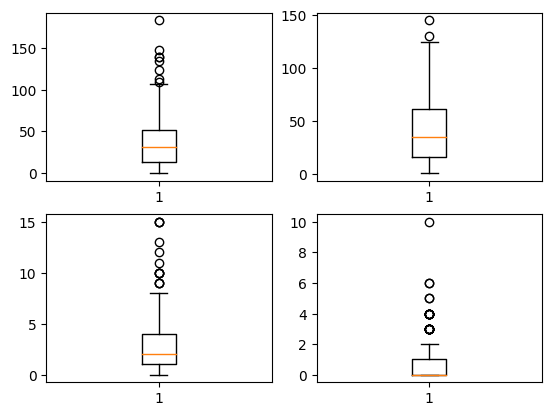

In [14]:
j=1
df_null_dropped = df.dropna()
for i in lis_disc:
    plt.subplot(2,2,j)
    plt.boxplot(df_null_dropped[i])
    j+=1
    
plt.show()

- the box plot shows there are outliers, but as there are techniques on how to treat outliers (Remove, Replace, Retain), after doing enough research on the data set, its found no value which is truly an outlier, so we retain all the values

In [15]:
#cleaning the df['odi_number'] -take empty list and as the loop cleans 'ODI #' it is appended to new list
odi = []
for i in df['odi_number']:
    i = i.replace('ODI # ', '') #replacing with an empty character
    odi.append(i)
    
df['odi_num'] = odi

In [16]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,odi_num
0,0,0,1,0.00,0,0,v Bangladesh,Chattogram,2004-12-23,ODI # 2199,2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,2004-12-26,ODI # 2201,2201
2,7*,7,2,350.00,0,1,v Bangladesh,Dhaka,2004-12-27,ODI # 2202,2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,2005-04-02,ODI # 2235,2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2236
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.80,3,2,v West Indies,Manchester,2019-06-27,ODI # 4175,4175
346,42*,42,31,135.48,4,1,v England,Birmingham,2019-06-30,ODI # 4179,4179
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,2019-07-02,ODI # 4182,4182
348,DNB,<NA>,<NA>,NaN,<NA>,<NA>,v Sri Lanka,Leeds,2019-07-06,ODI # 4187,4187


In [17]:
df = df.drop('odi_number', axis=1)

In [18]:
df.rename(columns={'odi_num':'odi_number'}, inplace=True)

In [19]:
df['odi_number'] = df['odi_number'].astype(int)

In [20]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0.00,0,0,v Bangladesh,Chattogram,2004-12-23,2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,2004-12-26,2201
2,7*,7,2,350.00,0,1,v Bangladesh,Dhaka,2004-12-27,2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,2005-04-02,2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,2005-04-05,2236
...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.80,3,2,v West Indies,Manchester,2019-06-27,4175
346,42*,42,31,135.48,4,1,v England,Birmingham,2019-06-30,4179
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,2019-07-02,4182
348,DNB,<NA>,<NA>,NaN,<NA>,<NA>,v Sri Lanka,Leeds,2019-07-06,4187


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   score        350 non-null    object        
 1   runs_scored  297 non-null    Int64         
 2   balls_faced  297 non-null    Int64         
 3   strike_rate  297 non-null    float64       
 4   fours        297 non-null    Int64         
 5   sixes        297 non-null    Int64         
 6   opposition   350 non-null    object        
 7   ground       350 non-null    object        
 8   date         350 non-null    datetime64[ns]
 9   odi_number   350 non-null    int64         
dtypes: Int64(4), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 28.8+ KB


In [22]:
#groupby opposition to calculate sum
runsVsOpposition = df.groupby('opposition')['runs_scored'].sum()

#create a dataframe
df_runsVsOpposition = pd.DataFrame(runsVsOpposition)

#default - sets the first column as index
df_runsVsOpposition.reset_index(inplace=True)

#sorting to be in an order
df_runsVsOpposition.sort_values(by='runs_scored',inplace=True, ascending=False)
df_runsVsOpposition

,opposition,runs_scored
13,v Sri Lanka,2383
2,v Australia,1660
5,v England,1546
10,v Pakistan,1231
15,v West Indies,1005
9,v New Zealand,940
12,v South Africa,830
3,v Bangladesh,569
16,v Zimbabwe,208
1,v Africa XI,174


#### Runs scored vs opposition: 

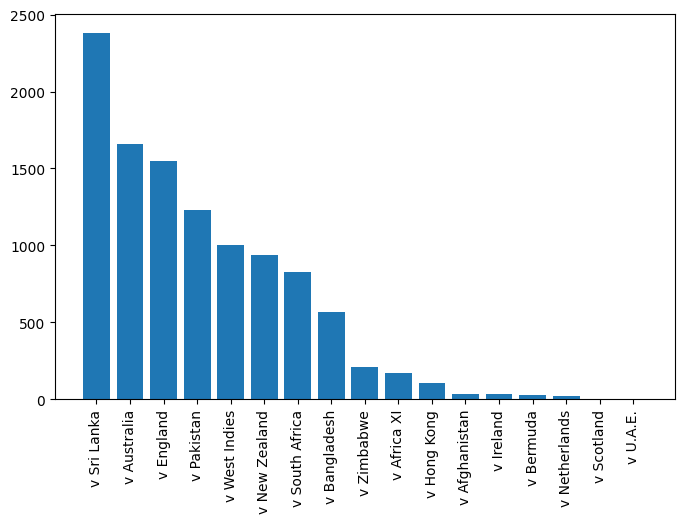

In [23]:
plt.figure(figsize=(8,5))
plt.bar(df_runsVsOpposition['opposition'], df_runsVsOpposition['runs_scored'])
plt.xlabel(None)
plt.xticks(rotation='vertical') #or rotation=90
plt.show()

- The maximun runs scored against is vs Srilnka follwed by Australia, England

#### Matches played against oppositions: 

<AxesSubplot: >

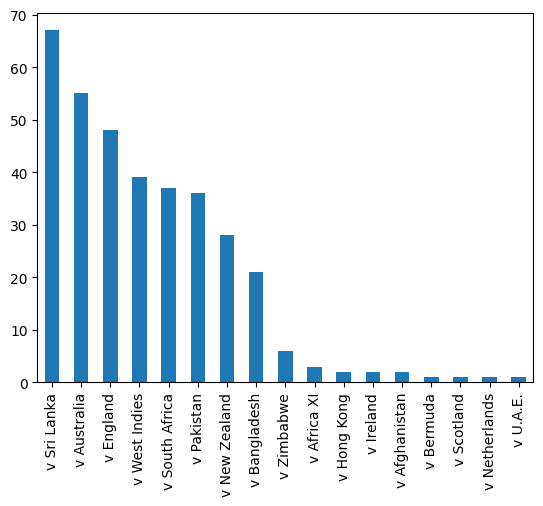

In [24]:
df['opposition'].value_counts().plot(kind='bar')

- The highest number of matches played against is Srilanka follwed by Australia and England

In [25]:
#create a column that shows whether he has been dismissed or not
df['score'] = df['score'].astype(str) #conv all the values into str
df['not_out'] = np.where(df['score'].str.endswith('*'), 1, 0)#if the string ends with * replace with 1 else 0

In [26]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,not_out
0,0,0,1,0.00,0,0,v Bangladesh,Chattogram,2004-12-23,2199,0
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,2004-12-26,2201,0
2,7*,7,2,350.00,0,1,v Bangladesh,Dhaka,2004-12-27,2202,1
3,3,3,7,42.85,0,0,v Pakistan,Kochi,2005-04-02,2235,0
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,2005-04-05,2236,0
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.80,3,2,v West Indies,Manchester,2019-06-27,4175,1
346,42*,42,31,135.48,4,1,v England,Birmingham,2019-06-30,4179,1
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,2019-07-02,4182,0
348,DNB,<NA>,<NA>,NaN,<NA>,<NA>,v Sri Lanka,Leeds,2019-07-06,4187,0


In [27]:
#number of times msd remained notout
df['not_out'].sum()

84

In [28]:
#index of highest individual score
df[df['runs_scored'] == df['runs_scored'].max()].index

Int64Index([21], dtype='int64')

In [29]:
#since score has dtype of string if we directly apply max() to score we get a string with max characters
#as runs_scored dtype is int and when applied .max() we extract the max value and displaying the score
#of that value and its index, but as we cant extract that we convert it into array and then extract the value
np.array(df[df['runs_scored'] == df['runs_scored'].max()]['score'])[0]

'183*'

- MSD score his highest score in his 21st innings

In [30]:
print('Career span:',df['date'].dt.year.max()-df['date'].dt.year.min(),'years')

Career span: 15 years


In [31]:
print(df['date'].dt.date.min().strftime('%B %d, %Y')) #B for month in full. b for month in short
print(df['date'].dt.date.max().strftime('%b %D, %y')) #Y for year in yyyy, y for year in yy

December 23, 2004
Jul 07/09/19, 19


In [32]:
print('------- Stats of MSD ODI career:')
print('\nDebut Match on:',df['date'].dt.date.min().strftime('%B %d, %Y'), df.loc[0,'opposition'])
print('Last match on:',df['date'].dt.date.max().strftime('%B %d, %Y'), df.loc[349, 'opposition'])
print('Total Matches played:',df['score'].count())#we can take any variable instead of score
                                    #we can also use df.shape[0] -- we get the total num of rows
print('Number of innings batted:',(df['runs_scored'].dropna().count()))#can take any col that represents DNB
print('Highest score:',np.array(df[df['runs_scored']==df['runs_scored'].max()]['score'])[0])
print('Total runs scored in ODI:',df['runs_scored'].sum())
print('Total Balls faced in ODI career:',df['balls_faced'].sum())
print('Average strike rate:','{:.2f}'.format((df['runs_scored'].sum()/df['balls_faced'].sum())*100))
print('Career average:',\
      round(df['runs_scored'].sum()/(df['runs_scored'].dropna().count()-df['not_out'].sum()),2))
    #10773/(297-84)
print('Total fours:',df['fours'].sum())
print('Total sixes:',df['sixes'].sum())
print('Number of centuries:',df[df['runs_scored']>99].shape[0])
print('Number of half centuries:',df[(df['runs_scored']>49) & (df['runs_scored']<100)].shape[0])
print('Number of times dismissed between 90 and 99:',\
      df[(df['runs_scored']>90) & (df['runs_scored']<100)].shape[0])
print('Number of times remained not out:',df['not_out'].sum())

------- Stats of MSD ODI career:

Debut Match on: December 23, 2004 v Bangladesh
Last match on: July 09, 2019 v New Zealand
Total Matches played: 350
Number of innings batted: 297
Highest score: 183*
Total runs scored in ODI: 10773
Total Balls faced in ODI career: 12303
Average strike rate: 87.56
Career average: 50.58
Total fours: 826
Total sixes: 229
Number of centuries: 10
Number of half centuries: 73
Number of times dismissed between 90 and 99: 6
Number of times remained not out: 84


- The result of pandas value_counts is a series
- converting value_counts into df by default puts the first column as index, and default has its axis name as index, if we didnt rename it, it has index as axis name so use rename_axis('opposition') which then removes the axis name as index and changes it to opposition
- rename_axis('opposition') sets the axis (index axis) name as opposition
- reset_index(name='matches'), resets the index values, and gives the remaining col name as matches

In [33]:
df_matches = df['opposition'].value_counts().rename_axis('opposition').reset_index(name='matches')
df_matches

,opposition,matches
0,v Sri Lanka,67
1,v Australia,55
2,v England,48
3,v West Indies,39
4,v South Africa,37
5,v Pakistan,36
6,v New Zealand,28
7,v Bangladesh,21
8,v Zimbabwe,6
9,v Africa XI,3


In [34]:
df_matches_runsVsOpp = pd.merge(df_runsVsOpposition, df_matches, on='opposition' )
df_matches_runsVsOpp

,opposition,runs_scored,matches
0,v Sri Lanka,2383,67
1,v Australia,1660,55
2,v England,1546,48
3,v Pakistan,1231,36
4,v West Indies,1005,39
5,v New Zealand,940,28
6,v South Africa,830,37
7,v Bangladesh,569,21
8,v Zimbabwe,208,6
9,v Africa XI,174,3


In [35]:
df[df['score'].isin(['DNB','TDNB'])][['score','opposition']].value_counts()

score  opposition    
DNB    v Sri Lanka       12
       v Australia        6
       v Pakistan         5
       v West Indies      5
       v Bangladesh       4
       v England          4
       v South Africa     4
       v Zimbabwe         3
       v New Zealand      2
TDNB   v Sri Lanka        2
DNB    v Ireland          1
       v Scotland         1
       v U.A.E.           1
TDNB   v Australia        1
       v South Africa     1
       v West Indies      1
dtype: int64

In [36]:
df[df['opposition']=='v Sri Lanka']['runs_scored'].isnull().sum()

14

In [37]:
lis = df['opposition'].unique()
dic = {}
dic['opposition'] = [] #create keys with empty list and then append from for loop
dic['dnb'] = []
for i in lis:
    dnb = df[df['opposition']==i]['runs_scored'].isnull().sum()
    dic['opposition'].append(i)
    dic['dnb'].append(dnb)

dnb = pd.DataFrame(dic)
dnb

,opposition,dnb
0,v Bangladesh,4
1,v Pakistan,5
2,v Sri Lanka,14
3,v West Indies,6
4,v New Zealand,2
5,v Zimbabwe,3
6,v South Africa,5
7,v England,4
8,v Australia,7
9,v Bermuda,0


In [38]:
df_nonull = df.dropna()
df_status = pd.crosstab(df_nonull['opposition'], df['not_out'])
df_status

not_out,0,1
opposition,,
v Afghanistan,2,0
v Africa XI,2,1
v Australia,37,11
v Bangladesh,12,5
v Bermuda,1,0
v England,33,11
v Hong Kong,1,1
v Ireland,1,0
v Netherlands,0,1


- this can also be achieved using groupby

In [39]:
df.groupby('opposition')['not_out'].sum()

opposition
v Afghanistan      0
v Africa XI        1
v Australia       11
v Bangladesh       5
v Bermuda          0
v England         11
v Hong Kong        1
v Ireland          0
v Netherlands      1
v New Zealand      7
v Pakistan         8
v Scotland         0
v South Africa     6
v Sri Lanka       16
v U.A.E.           0
v West Indies     15
v Zimbabwe         2
Name: not_out, dtype: int64

In [40]:
df_stats = pd.merge(df_matches_runsVsOpp,dnb, on='opposition')
df_stats['innings'] = df_stats['matches']-df_stats['dnb']
df_stats = pd.merge(df_stats, df_status, on='opposition')
df_stats.rename(columns = {0:'out', 1:'not_out'},inplace=True)
df_stats['average'] = df_stats['runs_scored']/(df_stats['innings']-df_stats['not_out'])
df_stats

,opposition,runs_scored,matches,dnb,innings,out,not_out,average
0,v Sri Lanka,2383,67,14,53,37,16,64.405405
1,v Australia,1660,55,7,48,37,11,44.864865
2,v England,1546,48,4,44,33,11,46.848485
3,v Pakistan,1231,36,5,31,23,8,53.521739
4,v West Indies,1005,39,6,33,18,15,55.833333
5,v New Zealand,940,28,2,26,19,7,49.473684
6,v South Africa,830,37,5,32,26,6,31.923077
7,v Bangladesh,569,21,4,17,12,5,47.416667
8,v Zimbabwe,208,6,3,3,1,2,208.0
9,v Africa XI,174,3,0,3,2,1,87.0


- since we get an avg of infinity when out is 0 we have to remove them (we get rid of inf v Netherlands)

In [41]:
df_stats['out'].replace(0,np.nan, inplace=True)
df_stats['out'] = df_stats['out'].astype('Int64')
df_stats.dropna()

,opposition,runs_scored,matches,dnb,innings,out,not_out,average
0,v Sri Lanka,2383,67,14,53,37,16,64.405405
1,v Australia,1660,55,7,48,37,11,44.864865
2,v England,1546,48,4,44,33,11,46.848485
3,v Pakistan,1231,36,5,31,23,8,53.521739
4,v West Indies,1005,39,6,33,18,15,55.833333
5,v New Zealand,940,28,2,26,19,7,49.473684
6,v South Africa,830,37,5,32,26,6,31.923077
7,v Bangladesh,569,21,4,17,12,5,47.416667
8,v Zimbabwe,208,6,3,3,1,2,208.0
9,v Africa XI,174,3,0,3,2,1,87.0


- PLot line plot showing average against main teams (take top 8)

### Average against top teams compared with career average 

In [42]:
career_avg = round(df['runs_scored'].sum()/(df['runs_scored'].dropna().count()-df['not_out'].sum()),2)
career_avg

50.58

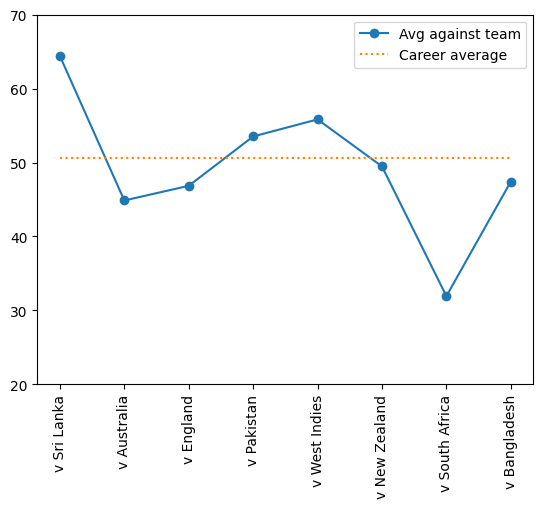

In [43]:
plt.plot(df_stats['opposition'].head(8), df_stats['average'].head(8), marker='o', label='Avg against team')
plt.plot([career_avg]*8, label = 'Career average', linestyle=':')
                
plt.ylim(20,70)
plt.xticks(rotation=90)

plt.legend()
plt.show()

### Analysis by year 

In [44]:
df['year']=df['date'].dt.year
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,not_out,year
0,0,0,1,0.00,0,0,v Bangladesh,Chattogram,2004-12-23,2199,0,2004
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,2004-12-26,2201,0,2004
2,7*,7,2,350.00,0,1,v Bangladesh,Dhaka,2004-12-27,2202,1,2004
3,3,3,7,42.85,0,0,v Pakistan,Kochi,2005-04-02,2235,0,2005
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,2005-04-05,2236,0,2005
...,...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.80,3,2,v West Indies,Manchester,2019-06-27,4175,1,2019
346,42*,42,31,135.48,4,1,v England,Birmingham,2019-06-30,4179,1,2019
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,2019-07-02,4182,0,2019
348,DNB,<NA>,<NA>,NaN,<NA>,<NA>,v Sri Lanka,Leeds,2019-07-06,4187,0,2019


#### Matches played per year 

<AxesSubplot: title={'center': 'matches played by year'}>

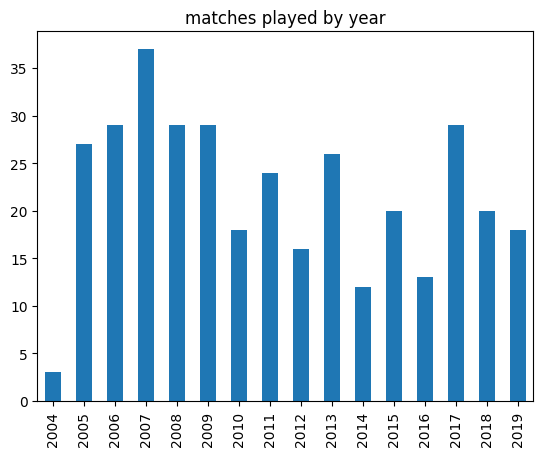

In [45]:
df['year'].value_counts().sort_index().plot(kind='bar', title='matches played by year')

- we can also use groupby year on one of the variable that didnt have a null value or effects by DNB

<AxesSubplot: title={'center': 'matches played by year'}, xlabel='year'>

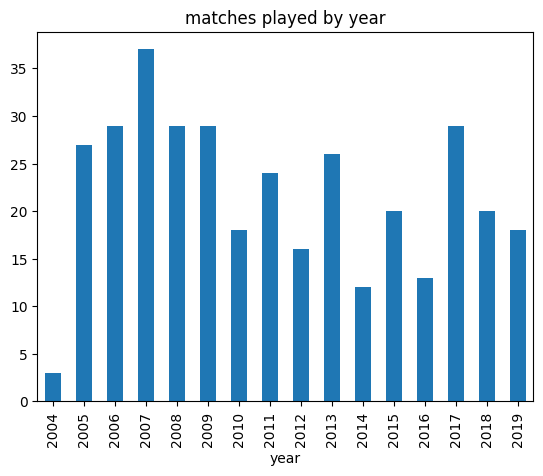

In [46]:
df.groupby('year')['opposition'].count().plot(kind='bar', title='matches played by year')

#### Runs scored by year 

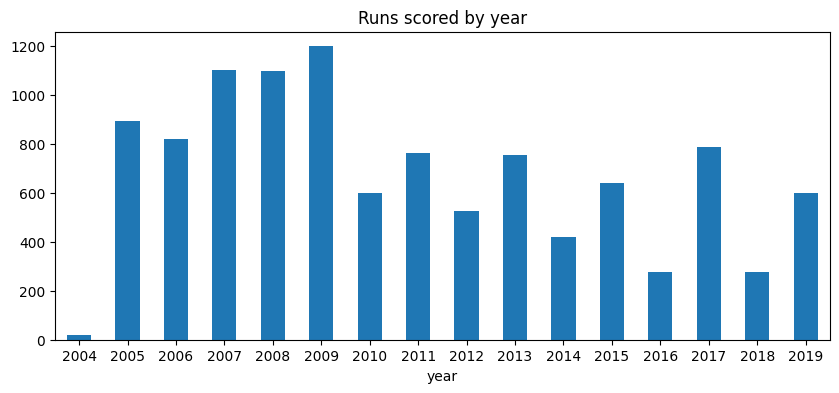

In [47]:
df.groupby('year')['runs_scored'].sum().plot(kind='bar',title='Runs scored by year', figsize=(10,4))
plt.xticks(rotation=0)
plt.show()

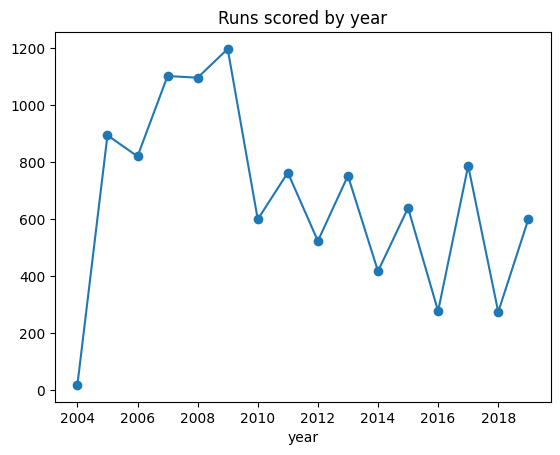

In [48]:
df.groupby('year')['runs_scored'].sum().plot(kind='line',title='Runs scored by year', marker='o')
plt.show()

#### Career progression 

In [49]:
df_matches_yr = df['year'].value_counts().rename_axis('year').reset_index(name='matches')
df_runs_yr = df.groupby('year')['runs_scored'].sum()
df_null_dropped = df.dropna()
df1 = df_null_dropped['year'].value_counts().rename_axis('year').reset_index(name='innings')
df2 = df_null_dropped.groupby('year')['not_out'].sum().reset_index(name='NOut')

merged_df = pd.merge(df_matches_yr, df_runs_yr, on='year')
merged_df = pd.merge(merged_df, df1, on='year')
merged_df = pd.merge(merged_df, df2, on='year')

merged_df['out'] = merged_df['innings']-merged_df['NOut']
merged_df['average'] = round(merged_df['runs_scored']/merged_df['out'],2)

merged_df.sort_values(by='year', inplace=True)
merged_df

,year,matches,runs_scored,innings,NOut,out,average
15,2004,3,19,3,1,2,9.5
5,2005,27,895,24,6,18,49.72
1,2006,29,821,26,6,20,41.05
0,2007,37,1103,33,8,25,44.12
2,2008,29,1097,26,7,19,57.74
3,2009,29,1198,24,7,17,70.47
10,2010,18,600,17,4,13,46.15
7,2011,24,764,22,9,13,58.77
12,2012,16,524,14,6,8,65.5
6,2013,26,753,20,8,12,62.75


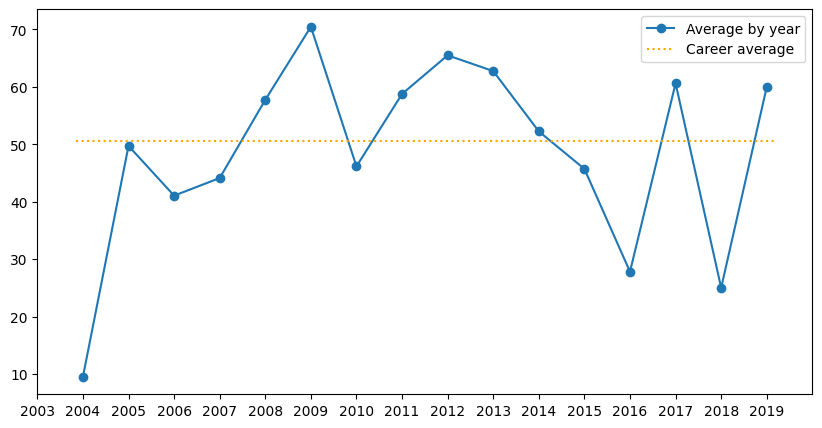

In [50]:
#li = [str(i) for i in range(2003,2020)]

plt.figure(figsize=(10,5))
plt.plot(merged_df['year'], merged_df['average'], marker='o', label='Average by year')
plt.axhline(y=career_avg, xmin=0.05, xmax=0.95, linestyle=':', label='Career average', color='orange')

plt.xlim(2003, 2020)
plt.xticks(range(2003,2020)) 

plt.legend()
plt.show()

In [51]:
df_null_dropped

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,not_out,year
0,0,0,1,0.00,0,0,v Bangladesh,Chattogram,2004-12-23,2199,0,2004
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,2004-12-26,2201,0,2004
2,7*,7,2,350.00,0,1,v Bangladesh,Dhaka,2004-12-27,2202,1,2004
3,3,3,7,42.85,0,0,v Pakistan,Kochi,2005-04-02,2235,0,2005
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,2005-04-05,2236,0,2005
...,...,...,...,...,...,...,...,...,...,...,...,...
344,28,28,52,53.84,3,0,v Afghanistan,Southampton,2019-06-22,4169,0,2019
345,56*,56,61,91.80,3,2,v West Indies,Manchester,2019-06-27,4175,1,2019
346,42*,42,31,135.48,4,1,v England,Birmingham,2019-06-30,4179,1,2019
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,2019-07-02,4182,0,2019


#### Average as the career progress: 

In [69]:
df_cum = df_null_dropped.drop(['opposition', 'ground','odi_number', 'fours', 'sixes'], axis=1)
df_cum['cum_runs'] = df_cum['runs_scored'].cumsum()
df_cum['cum_innings'] = range(1,298)-df_cum['not_out'].cumsum() #innings-notout
df_cum['cum_average'] = df_cum['cum_runs']/df_cum['cum_innings']

df_cum

,score,runs_scored,balls_faced,strike_rate,date,not_out,year,cum_runs,cum_innings,cum_average
0,0,0,1,0.00,2004-12-23,0,2004,0,1,0.0
1,12,12,11,109.09,2004-12-26,0,2004,12,2,6.0
2,7*,7,2,350.00,2004-12-27,1,2004,19,2,9.5
3,3,3,7,42.85,2005-04-02,0,2005,22,3,7.333333
4,148,148,123,120.32,2005-04-05,0,2005,170,4,42.5
...,...,...,...,...,...,...,...,...,...,...
344,28,28,52,53.84,2019-06-22,0,2019,10590,211,50.189573
345,56*,56,61,91.80,2019-06-27,1,2019,10646,211,50.454976
346,42*,42,31,135.48,2019-06-30,1,2019,10688,211,50.654028
347,35,35,33,106.06,2019-07-02,0,2019,10723,212,50.580189


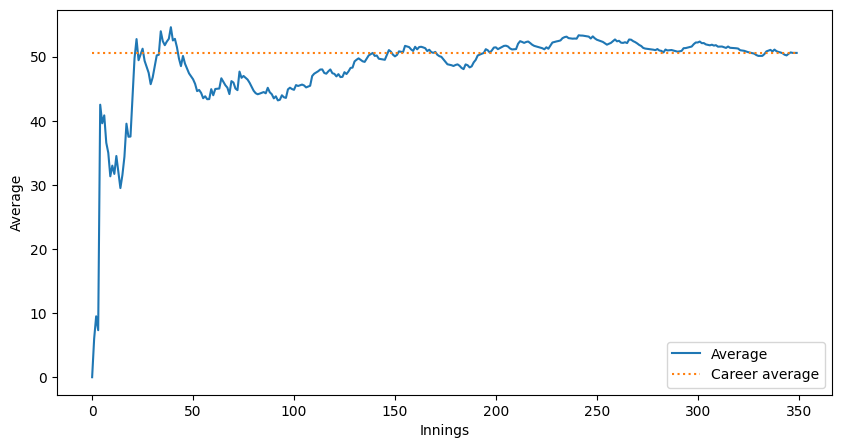

In [79]:
plt.figure(figsize=(10,5))
sns.lineplot(df_cum['cum_average'], label='Average')
sns.lineplot([career_avg]*(df.shape[0]), label='Career average', linestyle=':')
plt.xlabel('Innings')
plt.ylabel('Average')
plt.legend()
plt.show()

In [72]:
df.shape

(350, 12)

#### Boundaries by year 

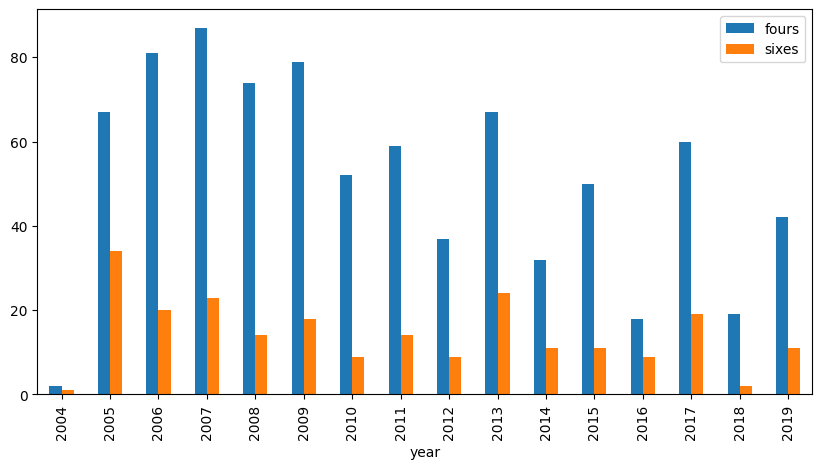

In [80]:
df_null_dropped.groupby('year')[['fours', 'sixes']].sum().plot(kind='bar', figsize=(10,5))
plt.show()

### Percentage of runs scored by boundary 

In [81]:
runs_total = df_null_dropped['runs_scored'].sum()
runs_boundaries = (runs_fours:=df_null_dropped['fours'].sum()*4)+\
                    (runs_sixes:=df_null_dropped['sixes'].sum()*6)
runs_notboundaries = runs_total-runs_boundaries

print('Total Runs:',runs_total, '\nRuns by boundaries:',runs_boundaries, \
      '\nRuns from 1s,2s,3s:',runs_notboundaries)

df_bound = pd.DataFrame({'Total Runs':runs_total, 'Runs by 4s':runs_fours,
                         'Runs by 6s':runs_sixes, 'Runs not from boundaries':runs_notboundaries},
                       index=[1])
df_bound

Total Runs: 10773 
Runs by boundaries: 4678 
Runs from 1s,2s,3s: 6095


,Total Runs,Runs by 4s,Runs by 6s,Runs not from boundaries
1,10773,3304,1374,6095


In [82]:
df_bound_t = df_bound.T.reset_index().rename(columns={'index':'type',1:'runs'})
df_bound_t

,type,runs
0,Total Runs,10773
1,Runs by 4s,3304
2,Runs by 6s,1374
3,Runs not from boundaries,6095


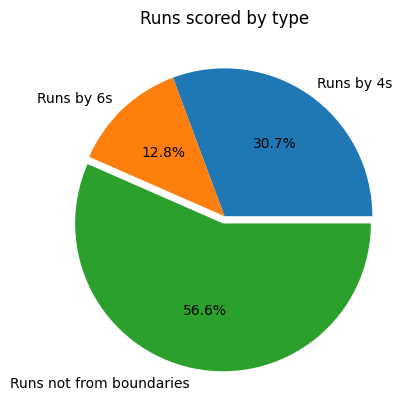

In [83]:
#drop the total runs row coz we use data of 4s, 6s, and others
#drop index 0 from both the axis and labels
plt.pie(df_bound_t['runs'].drop(0), labels=df_bound_t['type'].drop(0), autopct = '%0.1f%%', 
        explode=[0,0,0.05])
plt.title('Runs scored by type')
plt.show()

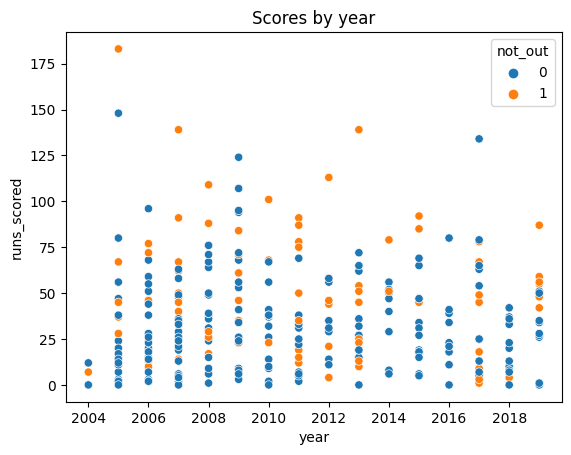

In [84]:
sns.scatterplot(x='year', y='runs_scored', data=df_null_dropped, hue='not_out')
plt.title('Scores by year')
plt.show()

/tmp/ipykernel_1575/1753128882.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr().drop(['odi_number','year']).drop(['odi_number','year'], axis=1)


,runs_scored,balls_faced,strike_rate,fours,sixes,not_out
runs_scored,1.000000,0.894661,0.261851,0.845680,0.699666,0.280124
balls_faced,0.894661,1.000000,-0.010946,0.679073,0.475314,0.155084
strike_rate,0.261851,-0.010946,1.000000,0.315004,0.353463,0.351404
fours,0.845680,0.679073,0.315004,1.000000,0.522770,0.232404
sixes,0.699666,0.475314,0.353463,0.522770,1.000000,0.250498
not_out,0.280124,0.155084,0.351404,0.232404,0.250498,1.000000


<AxesSubplot: >

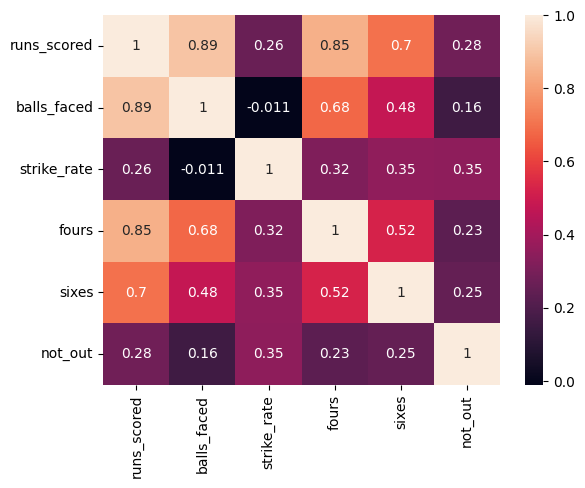

In [85]:
cor = df.corr().drop(['odi_number','year']).drop(['odi_number','year'], axis=1)
display(cor)

sns.heatmap(cor, annot=True)

# Miscellaneous 

In [92]:
df.groupby('year').size()

year
2004     3
2005    27
2006    29
2007    37
2008    29
2009    29
2010    18
2011    24
2012    16
2013    26
2014    12
2015    20
2016    13
2017    29
2018    20
2019    18
dtype: int64

In [91]:
df['year'].sort_values().value_counts()

2007    37
2006    29
2008    29
2009    29
2017    29
2005    27
2013    26
2011    24
2015    20
2018    20
2010    18
2019    18
2012    16
2016    13
2014    12
2004     3
Name: year, dtype: int64

In [94]:
#alike sort_values() which sorts based on the values we can provide sort_index, to sort based on index value
merged_df.sort_index()

,year,matches,runs_scored,innings,NOut,out,average
0,2007,37,1103,33,8,25,44.12
1,2006,29,821,26,6,20,41.05
2,2008,29,1097,26,7,19,57.74
3,2009,29,1198,24,7,17,70.47
4,2017,29,788,22,9,13,60.62
5,2005,27,895,24,6,18,49.72
6,2013,26,753,20,8,12,62.75
7,2011,24,764,22,9,13,58.77
8,2015,20,640,17,3,14,45.71
9,2018,20,275,13,2,11,25.0


In [99]:
#highest and least score in each year
df_max_ind = df_null_dropped.groupby('year')['runs_scored'].max().reset_index(name='high_score')
df_min_ind = df_null_dropped.groupby('year')['runs_scored'].min().reset_index(name='least_score')
df_min_max = pd.merge(df_max_ind, df_min_ind, on = 'year')
df_min_max.set_index('year', inplace=True)
df_min_max

,high_score,least_score
year,,
2004,12,0
2005,183,0
2006,96,2
2007,139,0
2008,109,1
2009,124,3
2010,101,0
2011,91,2
2012,113,4


In [105]:
#the same can be achieved using
df_null_dropped.groupby('year').runs_scored.agg([max,min])

,max,min
year,,
2004,12,0
2005,183,0
2006,96,2
2007,139,0
2008,109,1
2009,124,3
2010,101,0
2011,91,2
2012,113,4
